# pip install lightgbm scikit-learn

In [29]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt

In [30]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [31]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [32]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [33]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [34]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [35]:
# Create a binary version of your target variable
positive_class = 20
y_train_binary = (y_train == positive_class).astype(int)

In [36]:
# Initialize LightGBM Classifier
lgbm = LGBMClassifier(random_state=42)

In [37]:
# Fit the model on the training data
lgbm.fit(X_train, y_train_binary)

[LightGBM] [Info] Number of positive: 3108, number of negative: 3126
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 6234, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498556 -> initscore=-0.005775
[LightGBM] [Info] Start training from score -0.005775


LGBMClassifier(random_state=42)

In [38]:
# Predict probabilities on the training data
y_train_prob = lgbm.predict_proba(X_train)[:, 1]

In [39]:
# Calculate ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_prob)

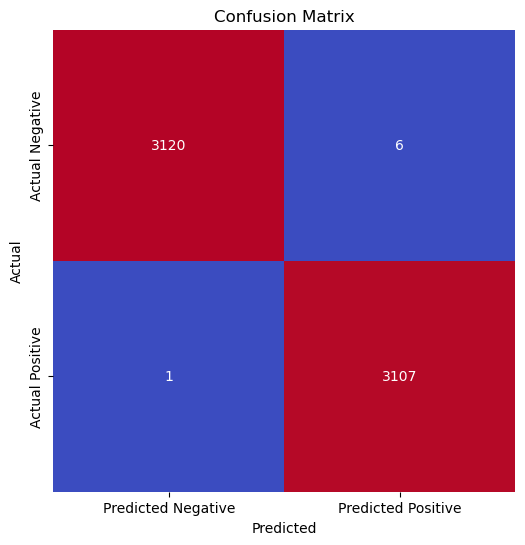

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
confusion_mat = confusion_matrix(y_train_binary, y_train_pred)

# Define custom colors for your heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a heatmap with custom colors
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap=cmap, cbar=False, square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
    # Save the plot as a PDF file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/LGBM_traint-confusion-matrix.pdf", format='pdf')

plt.show()

Confusion Matrix (Actual vs. Predicted):
                  Predicted Positive  Predicted Negative
Actual Positive                3120                   6
Actual Negative                   1                3107


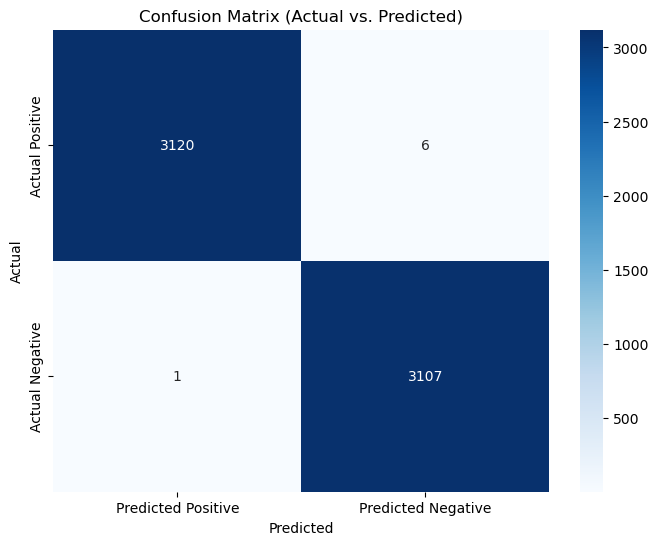

In [41]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train_binary, y_train_pred)

# Create a labeled confusion matrix
confusion_matrix_train = pd.DataFrame(conf_matrix, columns=[ "Predicted Positive","Predicted Negative"], index=["Actual Positive","Actual Negative"])

# Display the labeled confusion matrix
print("Confusion Matrix (Actual vs. Predicted):\n", confusion_matrix_train)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Actual vs. Predicted)")

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/LGBM/confusion matrix train data.svg", format='svg')


plt.show()

In [41]:
# Calculate AUC for training data
roc_auc_train = auc(fpr_train, tpr_train)

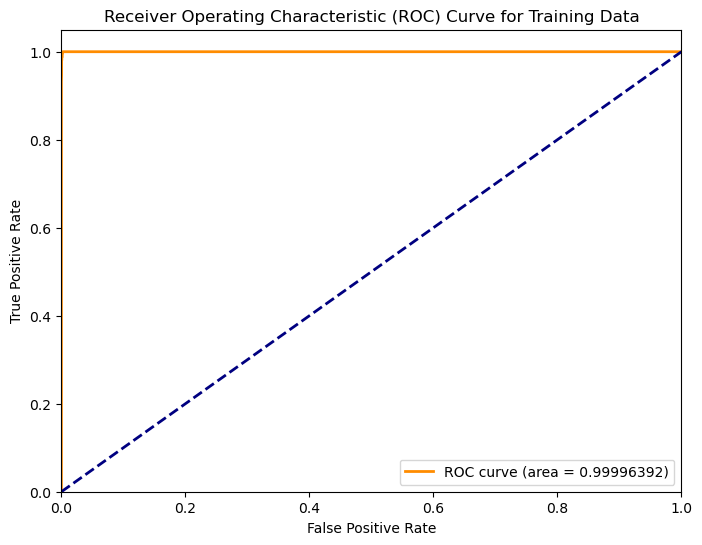

In [44]:
# Plot ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.8f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Data')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Print the calculated metrics for training data
print("ROC AUC (Training):", roc_auc_train)

ROC AUC (Training): 0.9999639240282234


In [13]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Predict on the training data
y_train_pred = lgbm.predict(X_train)

# Calculate Sensitivity (True Positive Rate/Recall) for training data
sensitivity_train = recall_score(y_train_binary, y_train_pred)

# Calculate Specificity (True Negative Rate) for training data
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train_binary, y_train_pred).ravel()
specificity_train = tn_train / (tn_train + fp_train)

# Calculate ROC AUC for training data
roc_auc_train = roc_auc_score(y_train_binary, y_train_pred)

# Calculate Accuracy for training data
accuracy_train = accuracy_score(y_train_binary, y_train_pred)

# Calculate Precision for training data
precision_train = precision_score(y_train_binary, y_train_pred)

# Calculate F1 Score for training data
f1_train = f1_score(y_train_binary, y_train_pred)

# Calculate Kappa Statistics for training data
kappa_train = cohen_kappa_score(y_train_binary, y_train_pred)

# Calculate Confusion Matrix for training data
conf_matrix_train = confusion_matrix(y_train_binary, y_train_pred)

# Calculate Classification Report for training data
class_report_train = classification_report(y_train_binary, y_train_pred)

# Print the calculated metrics for training data
print("Sensitivity/Recall (Training):", sensitivity_train)
print("Specificity (Training):", specificity_train)
print("ROC AUC (Training):", roc_auc_train)
print("Accuracy (Training):", accuracy_train)
print("Precision (Training):", precision_train)
print("F1 Score (Training):", f1_train)
print("Kappa Statistics (Training):", kappa_train)
print("Confusion Matrix (Training):\n", conf_matrix_train)
print("Classification Report (Training):\n", class_report_train)

Sensitivity/Recall (Training): 0.9996782496782497
Specificity (Training): 0.9980806142034548
ROC AUC (Training): 0.9988794319408523
Accuracy (Training): 0.9988771254411293
Precision (Training): 0.9980725987793125
F1 Score (Training): 0.9988747789744413
Kappa Statistics (Training): 0.9977542425609478
Confusion Matrix (Training):
 [[3120    6]
 [   1 3107]]
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3126
           1       1.00      1.00      1.00      3108

    accuracy                           1.00      6234
   macro avg       1.00      1.00      1.00      6234
weighted avg       1.00      1.00      1.00      6234



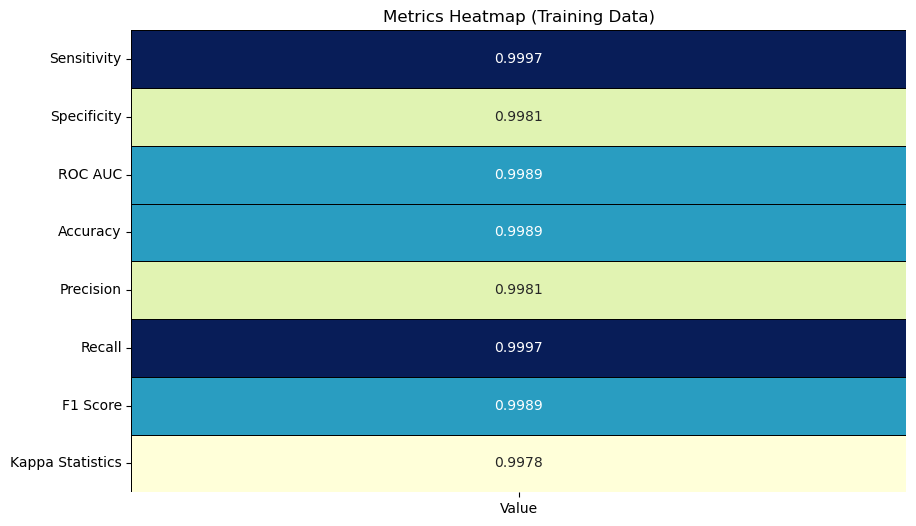

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to store metric values
metrics = {
    "Sensitivity": sensitivity_train,
    "Specificity": specificity_train,
    "ROC AUC": roc_auc_train,
    "Accuracy": accuracy_train,
    "Precision": precision_train,
    "Recall": sensitivity_train,  # Recall is the same as Sensitivity
    "F1 Score": f1_train,
    "Kappa Statistics": kappa_train,
}

# Convert the metrics dictionary into a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

# Create a heatmap for the metrics
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.4f', linewidths=0.5, linecolor='black', cbar=False)
plt.title('Metrics Heatmap (Training Data)')
plt.show()

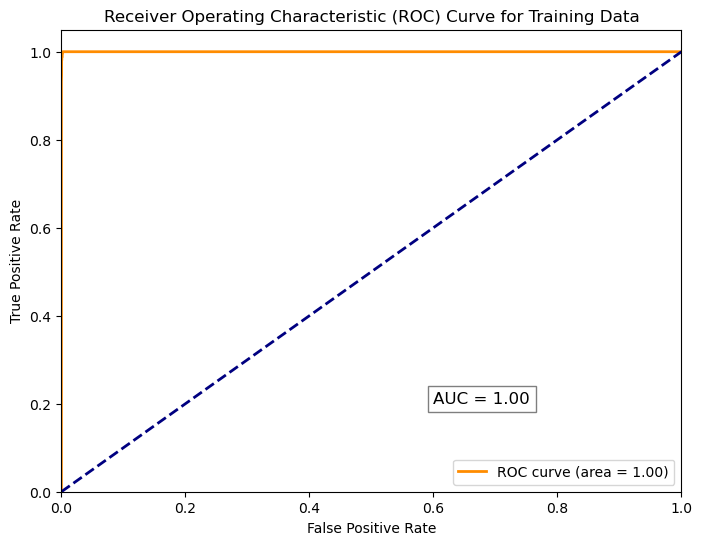

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you already have fpr_train and tpr_train from your ROC curve calculation

# Calculate AUC for training data
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Data')

# Label the plot with the AUC value
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(roc_auc_train), fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.legend(loc="lower right")
plt.show()